In [1]:
# Librairies
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk import word_tokenize, bigrams, trigrams
from collections import Counter
import os
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Majikthise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data import

Your data should be downloaded from https://apps.webofknowledge.com search engine. The format should be a .csv file.

Copy it in the same folder of the notebook and input the name in the code below.


In [2]:
current = 'ILRA_EXAMPLE_Data_rjs_cs_cc.xls'  # your new dataset
compare = ['ILRA_EXAMPLE_Data_rotary_jet_spinning.xls']  # your previus dataset

current_data = pd.read_excel(current)  # import in dataframe
raw_data = pd.DataFrame()

if not compare:
    print ("No previous search")
    raw_data = current_data.copy(deep=True)
else:
    print ("Comparing files and removing duplicate from previous searches")
    for filename in compare:
        df_compare_1 = pd.read_excel(filename)
        raw_data = pd.concat([df_compare_1, current_data]).drop_duplicates(keep=False).copy(deep=True)

# raw_data.head  # you can uncomment this line to check that the file appears correctly

Comparing files and removing duplicate from previous searches


# Data cleaning

1. duplicate removal
2. remove empty columns (NaN)
3. text cleaning

In [3]:
# locate duplicates
raw_data['dup'] = raw_data.duplicated(subset=None, keep='first')
# Counting the number of duplicates
raw_data['dup'].value_counts()
# Creating a new dataframe without the duplicates
raw_data_noDup = raw_data[raw_data['dup'] == False]
# Deleting the column with the True and False because because it is no more useful
del raw_data_noDup['dup']

In [4]:
# Removing useless columns (All articles have written nothing in those fields)
raw_data_useField = raw_data_noDup.dropna(axis=1, how='all')

In [5]:
# Changing the type of NaN to string
# (For text cleaning everything need to be string)
raw_data_str = raw_data_useField.fillna("NaN")

In [6]:
# Text cleaning (removal of "meaningless" words)
"""
SmartStoplist.txt
by Lisa Andreevna
Lisanka93/text_analysis_python_101. (n.d.). GitHub. Retrieved May 3, 2021,
from https://github.com/lisanka93/text_analysis_python_101
**** Note : nan is added to Lisa Andreevna's list ****
"""
# Definition of constant and variable
stop_words_file = 'SmartStoplist.txt'
stop_words = []
# Creating a list of stop words while reading the stop words's file
with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split())
# Do not understand yet
stop_words = stop_words
"""
Definition of a cleaning function (preprocess before words analysis)
This function get a text and return a text (string) of stemmed word in
lowercase without stop words and any caracter except letter
"""
def preprocess(raw_text):
    """
    Keep only letters in the text (lowercase and capitals) using Regex (re).
    Replace all symboles with a blank space.
    """
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    # Change the capitals for lowercase AND split into a list of words (no expression)
    words = letters_only_text.lower().split()
    # Define a variable to receive only the useful crop (or not) words
    cleaned_words = []
    # Remove stop words (Take word in list of words and make a list of clean words)
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    # Stem word (Creating a new list of stemmed word with the clean one)
    stemmed_words = []
    for word in cleaned_words:
        word = PorterStemmer().stem(word)
        stemmed_words.append(word)
    # After all those changes, convert back the final list into string
    return " ".join(stemmed_words)


In [7]:
# Clean abstracts of all the articles of the research (overwrite)
raw_data_str['Abstract'] = raw_data_str['Abstract'].apply(preprocess)
raw_data_str['Article Title'] = raw_data_str['Article Title'].apply(preprocess)
raw_data_str['Author Keywords'] = raw_data_str['Author Keywords'].apply(preprocess)
clean_data = raw_data_str

# Data exploration

1. Most common occurences
2. Find biagrams and trigrams 



In [31]:
# word count

def word_count(data):
    # input: data is 1 dataframe column containing the text for each entry in the dataset
    # Occurence of all the words
    # convert to a dataframe
    clean_words_occ = pd.DataFrame(Counter(" ".join(data).split()).most_common(), columns=['word', 'count'])

    # Most common bigrams and trigrams in clean data
    # Puting all abstracts into a list
    all_abstracts_list = data.tolist()
    # Defining variables
    all_abstracts_bigrams = []
    all_abstracts_trigrams = []

    # Creating list of bigrams and trigrams by abstracts, i.e. list[0]=allBigramOfAbs1
    for abstracts in all_abstracts_list:
        abstracts = word_tokenize(abstracts)
        all_abstracts_bigrams.append(list(bigrams(abstracts)))
        all_abstracts_trigrams.append(list(trigrams(abstracts)))

    # Obtaining the most commons ones by abstracts for all of them
    top3_bi = []
    for bi_by_abst in all_abstracts_bigrams:
        top3_bi_by_abst = Counter(bi_by_abst).most_common(3)
        top3_bi.append(top3_bi_by_abst)
    top3_tri = []
    for tri_by_abst in all_abstracts_trigrams:
        top3_tri_by_abst = Counter(tri_by_abst).most_common(3)
        top3_tri.append(top3_tri_by_abst)

    return clean_words_occ, all_abstracts_bigrams, all_abstracts_trigrams

## Abstracts

In [35]:
clean_words_occ, bigrams, trigrams = word_count(clean_data['Abstract'])
# uncomment to get a look
#clean_words_occ[0:10]  # top 10
#(top3_bi)
#(top3_tri)

## Analysis in the titles

In [10]:
category = 'Article Title'

#top_hundred, clean_word_occ, top3_bi, top3_tri = word_count(category, clean_data)
# uncomment to get a look
#top_hundred
#(top3_bi)
#(top3_tri)

## Analysis in the Author's keywords

In [11]:
category = 'Author Keywords'

#top_hundred, clean_word_occ, top3_bi, top3_tri = word_count(category, clean_data)
# uncomment to get a look
#top_hundred
#(top3_bi)
#(top3_tri)

# Visualization

Text(0.5, 1.0, 'Word count - top 10 in abstracts')

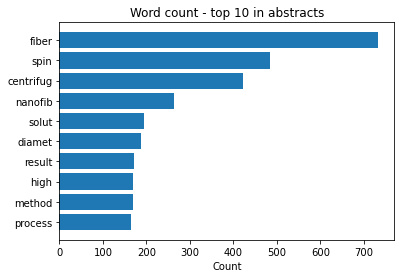

In [33]:
fig, ax = plt.subplots()

ax.barh(clean_words_occ['word'][0:10], clean_word_occ['count'][0:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Word count - top 10 in abstracts')

# Data save and export

In [36]:
# If there is no folder for the result create one
os.makedirs('Results', exist_ok=True)

# Word count data
clean_words_occ.to_csv('./Results/ILRA_CleanWordsOccurence.csv', sep=';')

# Bigrams and trigrams TO CORRECT
abstract_grams_df = pd.DataFrame([bigrams, trigrams])
abstract_grams_df.to_csv('./Results/ILRA_abstract_grams.csv', sep=';')